In [2]:
library(dplyr)
library(DataExplorer)
library(class)
library(ipred)
library(caret)
library(randomForest);

In [18]:
data <- read.csv(file="data/clean_data.csv", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [19]:
(data %>% sample_n(5))

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
25,Private,190107,Bachelors,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
34,Private,242984,Bachelors,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
59,Private,126677,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
59,Private,200700,Bachelors,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,48,United-States,>50K
23,Private,136824,Some-college,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
(colnames(data))

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "marital.status" "occupation"     "relationship"   "race"          
 [9] "sex"            "capital.gain"   "capital.loss"   "hours.per.week"
[13] "native.country" "income"

In [21]:
# trim_factor_columns <- function(x) {
#   if (is.factor(x)) {
#     x <- as.factor(trimws(as.character(x)))
#   }
#   return(x)
# }

adult_data <- data
#   mutate_if(is.factor, trim_factor_columns)

In [22]:
# columns_names_with_question <- names(adult_data)[sapply(adult_data, function(col) any(trimws(col) == "?"))]
# for (col_name in columns_names_with_question) {
#   adult_data[[col_name]][trimws(adult_data[[col_name]]) == "?"] <- NA
# }                                                    

In [23]:
# (columns_with_na <- colSums(is.na(adult_data)) > 0)

In [24]:
names(adult_data)[sapply(adult_data, function(col) any(col == " ?"))]

character(0)

In [25]:
# Missing observations?
sum(is.na(data))

[1] 0

In [27]:
adult_data$income_binary <- as.integer(as.numeric(adult_data$income) - 1)

In [28]:
adult_data

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


# Classification

## Linear regression

### Age & Education

In [29]:
model.1 <- lm(income_binary ~ age + education, data=adult_data)

In [30]:
pred_1 <- predict(model.1, adult_data)

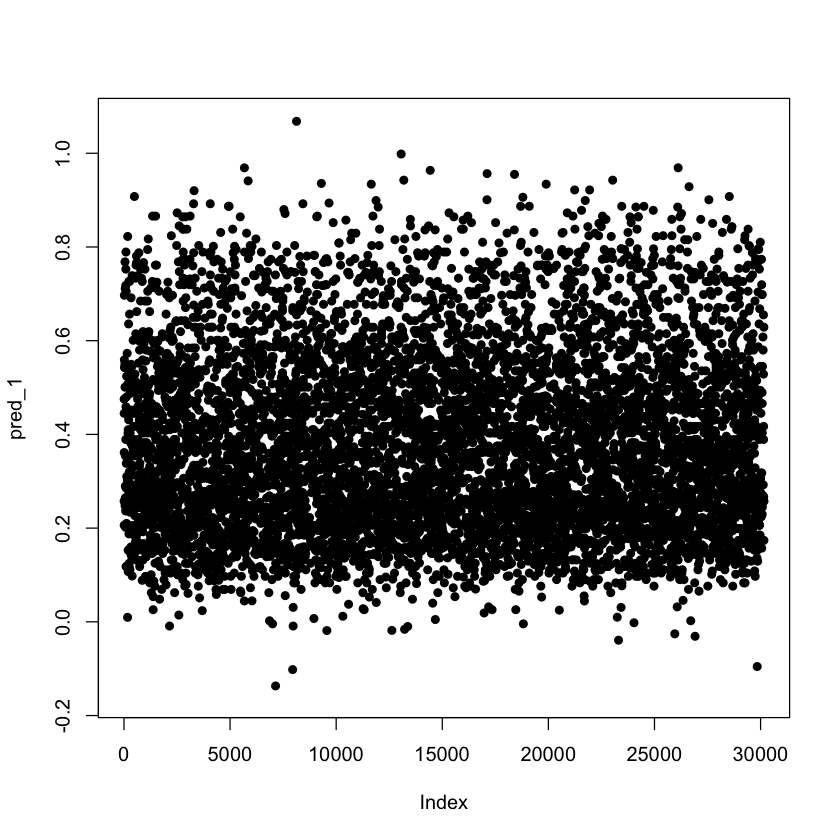

In [31]:
plot(pred_1, col=adult_data$income_binary, pch=16)

In [32]:
(confusion.matrix1 <- table(round(pred_1), adult_data$income_binary))

   
        0     1
  0 21528  5523
  1  1125  1985

In [33]:
(accuracy1 <- sum(diag(confusion.matrix1))/sum(confusion.matrix1))

[1] 0.7795829

### Sex

In [34]:
model.2 <- lm(income_binary ~ sex, data=adult_data)

In [35]:
pred_2 <- predict(model.2, adult_data)

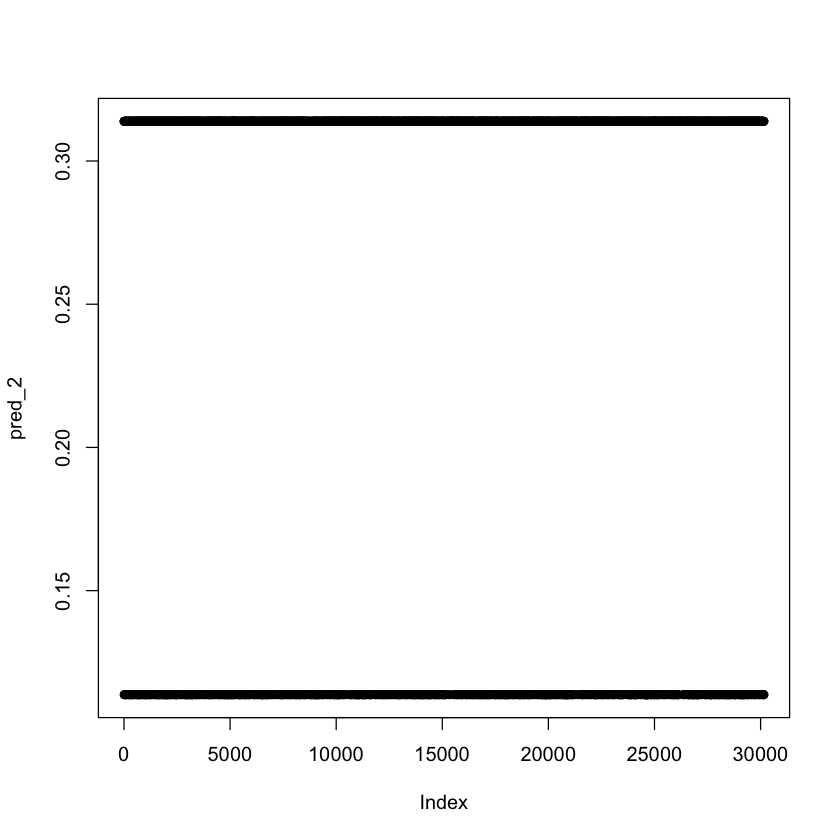

In [36]:
plot(pred_2, col=adult_data$income_binary, pch=16)

In [37]:
(confusion.matrix2 <- table(round(pred_2), adult_data$income_binary))

   
        0     1
  0 22653  7508

In [38]:
(accuracy2 <- sum(diag(confusion.matrix2))/sum(confusion.matrix2))

[1] 0.7510693

### Age, Education, Marital status, Relationship, Race, Sex

In [39]:
model.3 <- lm(income_binary ~ age + education + marital.status + relationship + race + sex, data=adult_data)

In [40]:
pred_3 <- predict(model.3, adult_data)

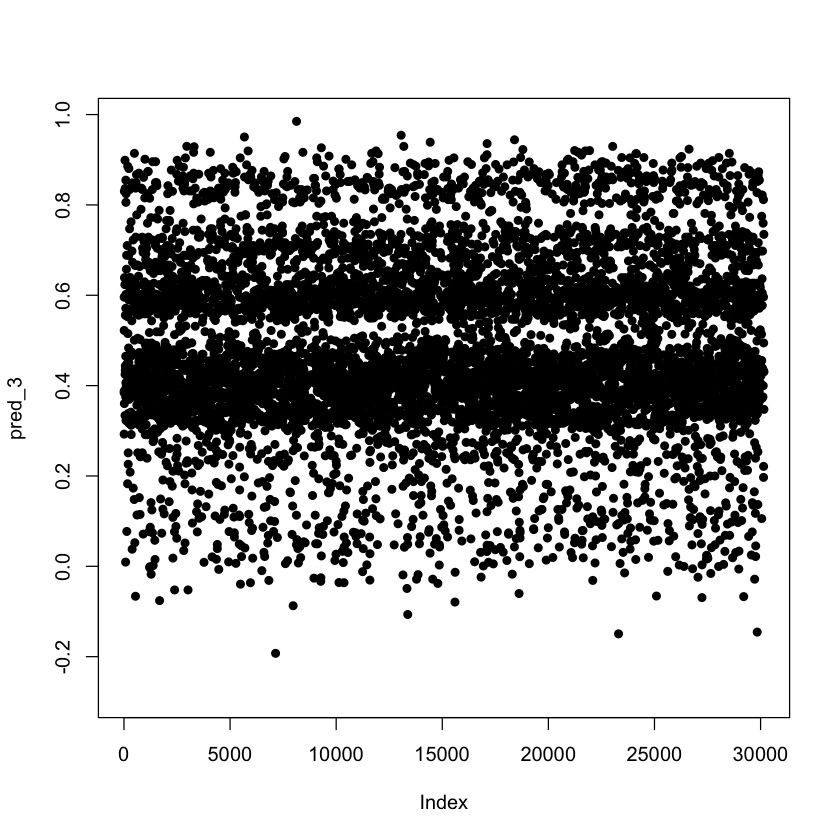

In [41]:
plot(pred_3, col=adult_data$income_binary, pch=16)

In [42]:
(confusion.matrix3 <- table(round(pred_3), adult_data$income_binary))

   
        0     1
  0 21404  4284
  1  1249  3224

In [43]:
(accuracy3 <- sum(diag(confusion.matrix3))/sum(confusion.matrix3))

[1] 0.8165512

## ALL

In [79]:
model.all <- lm(income_binary ~ ., data=adult_data)

In [80]:
pred_all <- predict(model.all, adult_data)

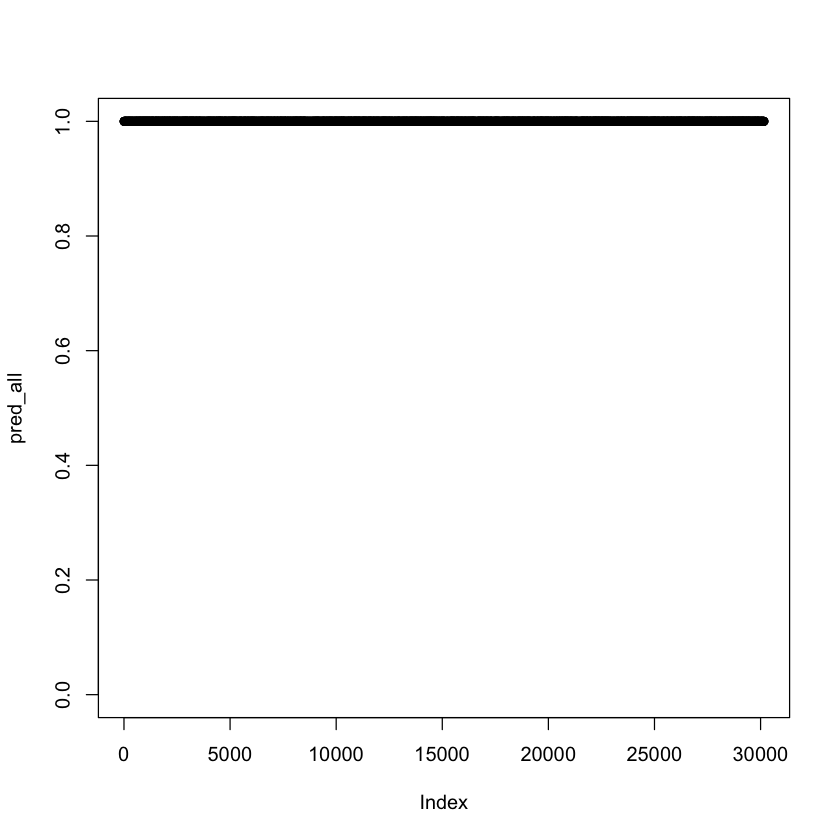

In [81]:
plot(pred_all, col=adult_data$income_binary, pch=16)

In [83]:
(confusion.matrix.all <- table(round(pred_all), adult_data$income_binary))

   
        0     1
  0 22653     0
  1     0  7508

In [85]:
(accuracy.all <- sum(diag(confusion.matrix.all))/sum(confusion.matrix.all))

[1] 1

## k-NN 

In [86]:
(n <- dim(adult_data)[1])

[1] 30161

In [87]:
sum(is.na(adult_data))

[1] 0

In [88]:
training.set.index <- sample(1:n, 3/4*n)

In [89]:
training.set <- adult_data[training.set.index,]
test.set <- adult_data[-training.set.index,]

In [90]:
real.labels <- test.set$income_binary

### All

In [91]:
model.knn.all <- ipredknn(income_binary ~ . , data=training.set, k=5)

In [92]:
predicted.labels.all <- predict(model.knn.all,test.set, type="class")

In [93]:
(confusion.matrix.knn.all <- table(predicted.labels.all, real.labels))

                    real.labels
predicted.labels.all    0    1
                   0 5171 1247
                   1  543  580

In [94]:
n.test <- dim(test.set)[1]
(n.test - sum(diag(confusion.matrix.knn.all))) / n.test

[1] 0.237369

In [95]:
(accuracy.knn.all <- sum(diag(confusion.matrix.knn.all))/sum(confusion.matrix.knn.all))

[1] 0.762631

In [96]:
knn.all <- caret::confusionMatrix(confusion.matrix.knn.all)
knn.all

Confusion Matrix and Statistics

                    real.labels
predicted.labels.all    0    1
                   0 5171 1247
                   1  543  580
                                          
               Accuracy : 0.7626          
                 95% CI : (0.7529, 0.7722)
    No Information Rate : 0.7577          
    P-Value [Acc > NIR] : 0.1633          
                                          
                  Kappa : 0.256           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9050          
            Specificity : 0.3175          
         Pos Pred Value : 0.8057          
         Neg Pred Value : 0.5165          
             Prevalence : 0.7577          
         Detection Rate : 0.6857          
   Detection Prevalence : 0.8511          
      Balanced Accuracy : 0.6112          
                                          
       'Positive' Class :

### Age, Education, Marital status, Relationship, Race, Sex

In [49]:
model.knn.1 <- ipredknn(income_binary ~ age + education + marital.status + relationship + race + sex , data=training.set, k=5)

In [50]:
predicted.labels.1 <- predict(model.knn.1,test.set, type="class")

In [51]:
(confusion.matrix.knn1 <- table(predicted.labels.1, real.labels))

                  real.labels
predicted.labels.1    0    1
                 0 5137  919
                 1  536  949

In [52]:
n.test <- dim(test.set)[1]
(n.test - sum(diag(confusion.matrix.knn1))) / n.test

[1] 0.1929452

In [53]:
(accuracy.knn1 <- sum(diag(confusion.matrix.knn1))/sum(confusion.matrix.knn1))

[1] 0.8070548

In [54]:
knn.1 <- caret::confusionMatrix(confusion.matrix.knn1)
knn.1

Confusion Matrix and Statistics

                  real.labels
predicted.labels.1    0    1
                 0 5137  919
                 1  536  949
                                         
               Accuracy : 0.8071         
                 95% CI : (0.798, 0.8159)
    No Information Rate : 0.7523         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.4441         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9055         
            Specificity : 0.5080         
         Pos Pred Value : 0.8482         
         Neg Pred Value : 0.6391         
             Prevalence : 0.7523         
         Detection Rate : 0.6812         
   Detection Prevalence : 0.8031         
      Balanced Accuracy : 0.7068         
                                         
       'Positive' Class : 0              
          

### Age & Education

In [55]:
model.knn.2 <- ipredknn(income_binary ~ age + education, data=training.set, k=5)

In [56]:
predicted.labels.2 <- predict(model.knn.2,test.set, type="class")

In [57]:
(confusion.matrix.knn2 <- table(predicted.labels.2, real.labels))

                  real.labels
predicted.labels.2    0    1
                 0 5189 1224
                 1  484  644

In [58]:
(accuracy.knn2 <- sum(diag(confusion.matrix.knn2))/sum(confusion.matrix.knn2))

[1] 0.7735048

In [59]:
knn.2 <- caret::confusionMatrix(confusion.matrix.knn2)
knn.2

Confusion Matrix and Statistics

                  real.labels
predicted.labels.2    0    1
                 0 5189 1224
                 1  484  644
                                          
               Accuracy : 0.7735          
                 95% CI : (0.7639, 0.7829)
    No Information Rate : 0.7523          
    P-Value [Acc > NIR] : 8.734e-06       
                                          
                  Kappa : 0.2992          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9147          
            Specificity : 0.3448          
         Pos Pred Value : 0.8091          
         Neg Pred Value : 0.5709          
             Prevalence : 0.7523          
         Detection Rate : 0.6881          
   Detection Prevalence : 0.8504          
      Balanced Accuracy : 0.6297          
                                          
       'Positive' Class : 0      

### Age

In [60]:
model.knn.3 <- ipredknn(income_binary ~ age, data=training.set, k=1)

In [61]:
predicted.labels.3 <- predict(model.knn.3,test.set, type="class")

In [62]:
(confusion.matrix.knn3 <- table(predicted.labels.3, real.labels))

                  real.labels
predicted.labels.3    0    1
                 0 5673 1868
                 1    0    0

In [63]:
(accuracy.knn3 <- sum(diag(confusion.matrix.knn3))/sum(confusion.matrix.knn3))

[1] 0.7522875

In [64]:
knn.3 <- caret::confusionMatrix(confusion.matrix.knn3)
knn.3

Confusion Matrix and Statistics

                  real.labels
predicted.labels.3    0    1
                 0 5673 1868
                 1    0    0
                                         
               Accuracy : 0.7523         
                 95% CI : (0.7424, 0.762)
    No Information Rate : 0.7523         
    P-Value [Acc > NIR] : 0.5062         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.7523         
         Neg Pred Value :    NaN         
             Prevalence : 0.7523         
         Detection Rate : 0.7523         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : 0              
          

# Caret

In [97]:
X <- adult_data %>% select(c('age', 'education', 'relationship', 'race', 'sex'))
Y <- adult_data$income_binary

In [98]:
in.train.data <- createDataPartition(y=Y, times=1, p=3/4, list=FALSE)

In [99]:
X.train.set <- X[in.train.data,]
X.test.set <- X[-in.train.data,]
Y.train.set <- Y[in.train.data]
Y.test.set <- Y[-in.train.data]

In [100]:
prop.table(table(Y.train.set))
prop.table(table(Y.test.set))

Y.train.set
        0         1 
0.7497458 0.2502542 

Y.test.set
        0         1 
0.7550398 0.2449602 

# Random Forest

In [101]:
set.seed(222)
ind <- sample(2, nrow(adult_data), replace = TRUE, prob = c(0.7, 0.3))
train <- adult_data[ind==1,]
test <- adult_data[ind==2,]

## ALL

In [107]:
rf.all <- randomForest(as.factor(income_binary)~., data=train, 
                        importance = TRUE, 
                        proximity = TRUE)

In [108]:
rf.all


Call:
 randomForest(formula = as.factor(income_binary) ~ ., data = train,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0%
Confusion matrix:
      0    1 class.error
0 15865    0           0
1     0 5260           0

In [109]:
predict.rf.all <- predict(rf.all,test, type="class")

In [110]:
(confusion.matrix.rf.all <- table(predict.rf.all, test$income_binary))

              
predict.rf.all    0    1
             0 6788    0
             1    0 2248

In [111]:
rf.all <- caret::confusionMatrix(confusion.matrix.rf.all)
rf.all

Confusion Matrix and Statistics

              
predict.rf.all    0    1
             0 6788    0
             1    0 2248
                                     
               Accuracy : 1          
                 95% CI : (0.9996, 1)
    No Information Rate : 0.7512     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.7512     
         Detection Rate : 0.7512     
   Detection Prevalence : 0.7512     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

## Age, Sex, Race

In [70]:
rf <- randomForest(as.factor(income_binary)~age + sex + race, data=train, 
                        importance = TRUE, 
                        proximity = TRUE)

In [71]:
rf


Call:
 randomForest(formula = as.factor(income_binary) ~ age + sex +      race, data = train, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 1

        OOB estimate of  error rate: 24.9%
Confusion matrix:
      0 1 class.error
0 15865 0           0
1  5260 0           1

In [72]:
predict.rf.1 <- predict(rf,test, type="class")

In [73]:
(confusion.matrix.rf1 <- table(predict.rf.1, test$income_binary))

            
predict.rf.1    0    1
           0 6788 2248
           1    0    0

In [74]:
rf.1 <- caret::confusionMatrix(confusion.matrix.rf1)
rf.1

Confusion Matrix and Statistics

            
predict.rf.1    0    1
           0 6788 2248
           1    0    0
                                          
               Accuracy : 0.7512          
                 95% CI : (0.7422, 0.7601)
    No Information Rate : 0.7512          
    P-Value [Acc > NIR] : 0.5057          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.7512          
         Neg Pred Value :    NaN          
             Prevalence : 0.7512          
         Detection Rate : 0.7512          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 0               
                         

## All no Nans

In [75]:
rf.2 <- randomForest(as.factor(income_binary)~ age + education + marital.status + relationship + race + sex, data=train, 
                        importance = TRUE, 
                        proximity = TRUE)

In [76]:
predict.rf.2 <- predict(rf.2,test, type="class")

In [77]:
(confusion.matrix.rf2 <- table(predict.rf.2, test$income_binary))

            
predict.rf.2    0    1
           0 6256 1054
           1  532 1194

In [78]:
rf.2 <- caret::confusionMatrix(confusion.matrix.rf2)
rf.2

Confusion Matrix and Statistics

            
predict.rf.2    0    1
           0 6256 1054
           1  532 1194
                                          
               Accuracy : 0.8245          
                 95% CI : (0.8165, 0.8323)
    No Information Rate : 0.7512          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4909          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9216          
            Specificity : 0.5311          
         Pos Pred Value : 0.8558          
         Neg Pred Value : 0.6918          
             Prevalence : 0.7512          
         Detection Rate : 0.6923          
   Detection Prevalence : 0.8090          
      Balanced Accuracy : 0.7264          
                                          
       'Positive' Class : 0               
                         